In [37]:
from __future__ import print_function, division
import pandas as pd
from meye import MEImage
from scipy import signal as sg
from scipy.ndimage.filters import maximum_filter
%pylab inline
plt.rcParams['image.cmap'] = 'gray'

Populating the interactive namespace from numpy and matplotlib


In [97]:
df = pd.read_pickle("store.pickle")
# df.head()

# step 1

In [81]:
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
sobel_kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) / 8

In [110]:
line_zero = df.iloc[0]
curr_rect = one_ex.currRect
prev_rect = one_ex.prevRect
# curr_rect

In [84]:
cimage = MEImage.from_file(one_ex.currImage)
pimage = MEImage.from_file(one_ex.prevImage)

In [109]:
# plt.imshow(pimage.im,cmap='gray',origin='lower')
# plt.imshow(cimage.im,cmap='gray')

In [88]:
prev_rect_mat = pimage.im[prev_rect[2]:prev_rect[3],prev_rect[0]:prev_rect[1]]
curr_rect_mat = cimage.im[curr_rect[2]:curr_rect[3],curr_rect[0]:curr_rect[1]]

In [111]:
# plt.imshow(prev_rect_mat,cmap='gray',origin='lower')
# plt.imshow(curr_rect_mat,cmap='gray',origin='lower')

In [90]:
prev_dx = sg.convolve2d(prev_rect_mat, sobel_kernel_x, "same")
prev_dy = sg.convolve2d(prev_rect_mat, sobel_kernel_y, "same") 

In [91]:
# plt.imshow(prev_dx,cmap='gray',origin='lower')
# plt.imshow(prev_dy,cmap='gray',origin='lower')

In [94]:
max_prev_dx = maximum_filter(prev_dx, 5)
max_prev_dy = maximum_filter(prev_dy, 5)

In [96]:
# plt.imshow(max_prev_dx,cmap='gray',origin='lower')
# plt.imshow(max_prev_dy,cmap='gray',origin='lower')

# step 2

In [100]:
prev_mat_xx = prev_dx ** 2
prev_mat_yy = prev_dy * prev_dy
prev_mat_xy = prev_dx ** 2

# step 3

In [151]:
patch_filter = np.ones((5,5)) / 9
# patch_filter

In [152]:
sxx = sg.convolve2d(prev_mat_xx, patch_filter, "same")
sxy = sg.convolve2d(prev_mat_xy, patch_filter, "same")
syy = sg.convolve2d(prev_mat_yy, patch_filter, "same")

In [156]:
# plt.imshow(sxx,cmap='gray',origin='lower')
# plt.imshow(sxy,cmap='gray',origin='lower')
# plt.imshow(syy,cmap='gray',origin='lower')

# step 4 + 5

In [170]:
R = zeros(prev_mat_xx.shape)
k = 0.05

In [171]:
R

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
for x in range(prev_rect_mat.shape[0]):
    for y in range(prev_rect_mat.shape[1]):
        H = np.array([[sxx[x][y], sxy[x][y]], [sxy[x][y], syy[x][y]]])
#         R[x][y] = ((H[0][0] * H[1][1]) - H[0][1]*H[0][1]) - np.trace
        R[x][y] = np.linalg.det(H) - k*(np.trace(H))**2

In [175]:
R

array([[   83300.13342978,   117874.57631896,   152712.96506016, ...,
           85690.10375916,    66432.00677023,    46704.11224139],
       [  123028.69661398,   186860.71351997,   262807.85086263, ...,
          184945.4071928 ,   147514.83202884,   105718.37829801],
       [  288031.26845281,   438264.11973802,   594756.36267542, ...,
          573958.34161603,   484865.42379135,   347976.56925094],
       ...,
       [ 4893335.00987655,  7013105.92746672,  9081060.26632367, ...,
        10878397.36458092,  8434651.18836565,  5924907.26215941],
       [ 3840308.86303771,  5457513.7203963 ,  7022845.32725454, ...,
         8420141.14400738,  6570223.39128569,  4654271.30747191],
       [ 2735898.16155418,  3852001.97283408,  4916189.13953993, ...,
         5893758.56201233,  4637638.75576232,  3315502.65331729]])

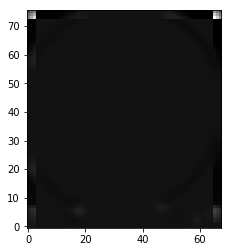

In [177]:
plt.imshow(R,cmap='gray',origin='lower')

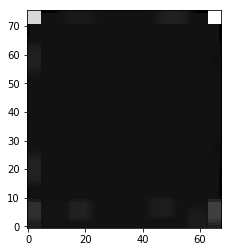

In [178]:
mmm = maximum_filter(R, 5)
plt.imshow(mmm,cmap='gray',origin='lower')